## Task 2 of Data science and Business Analytics Internships

## Author- Shivam Sharma

### Problem Statement

From the given 'Iris' dataset,predict the optimum number of clusters and represent it visually.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Step-1 Understand the data

In [2]:
### Load the dataset
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

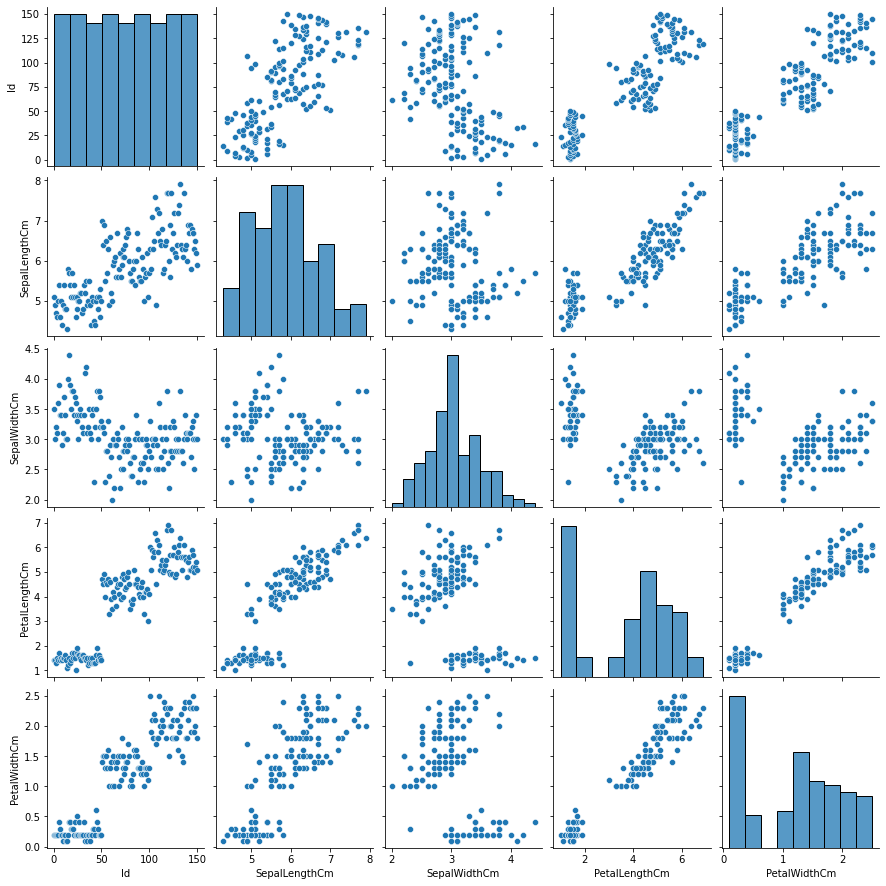

In [8]:
sns.pairplot(data=data)

### Step-2 Checking for NULL values or Cleaning the data

In [9]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

As you can see here,their is no Null values are present. Hence, our data is clean.

In [10]:
### drop the and ID columns
data = data.drop(['Id'],axis=1)

In [11]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


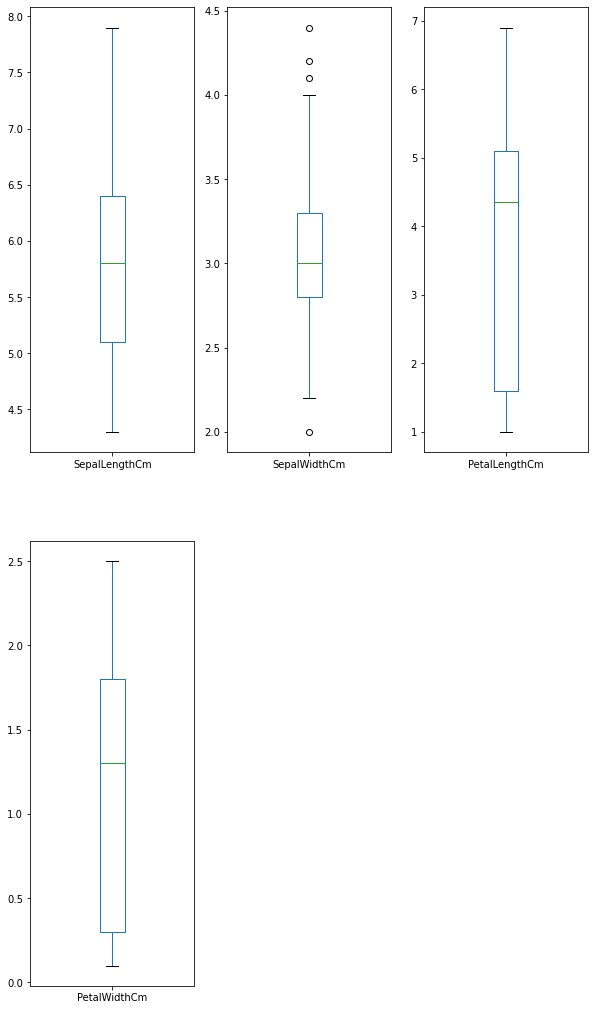

In [12]:
#### Checking for the outliers and removing it with IQR Method
data.plot(kind='box',subplots=True,layout=[2,3],sharex=False,figsize=[10,18])
plt.show()


As you can see from the box plot only Sepalwidth contains the outliers. So, we have to remove those outliers.

In [13]:
#calculate the first quartile
Q1 = data.quantile(0.25)
#calculate the third quartile
Q3 = data.quantile(0.75)
#calculate IQR
IQR = Q3-Q1
data= data[~((data<(Q1 - 1.5*IQR)) | (data> (Q3 + 1.5*IQR))).any(axis=1)]
data = data.reset_index(drop=True)

C:\Users\krish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


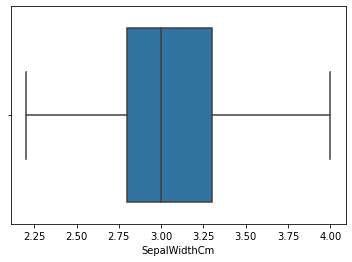

In [14]:
sns.boxplot(data['SepalWidthCm'])
plt.show()

As we successfuly removed the outliers in the given dataset.

### Step-3 Scaling the feature before doing clustering

In [15]:
X = data.iloc[:,0:4]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
141,6.7,3.0,5.2,2.3
142,6.3,2.5,5.0,1.9
143,6.5,3.0,5.2,2.0
144,6.2,3.4,5.4,2.3


In [16]:
### scale the feature with StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
x_scaled = pd.DataFrame(x,columns=X.columns)
x_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.910515,1.175789,-1.374878,-1.345899
1,-1.151122,-0.093924,-1.374878,-1.345899
2,-1.391729,0.413961,-1.431986,-1.345899
3,-1.512032,0.160019,-1.317771,-1.345899
4,-1.030819,1.429732,-1.374878,-1.345899


### Step-4 Perform Kmeans clustering with K=3

In [17]:
kmeans = KMeans(n_clusters = 3, init ='k-means++',random_state=101)

In [18]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters = num_clusters,init = 'k-means++',random_state = 1)
    kmeans.fit(x_scaled)
    cluster_errors.append(kmeans.inertia_)
cluster_df = pd.DataFrame({'Num_Clusters':cluster_range,'Inertia':cluster_errors})
cluster_df

,Num_Clusters,Inertia
0,1,584.000000
1,2,218.934500
2,3,135.398152
3,4,110.594050
4,5,89.372108
5,6,78.146896
6,7,68.321940
7,8,61.922827
8,9,52.473587
9,10,45.905992


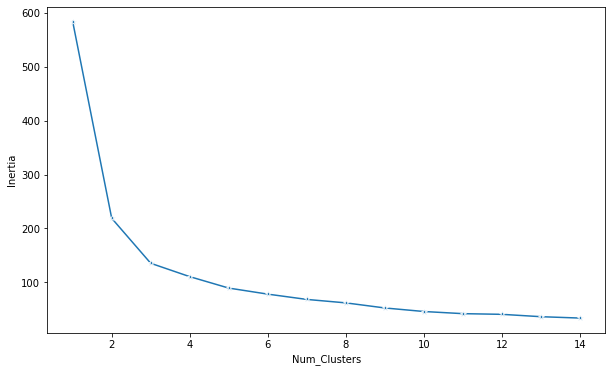

In [19]:
### visualize elbow to check value of k
plt.figure(figsize=(10,6))
sns.lineplot(x = cluster_df['Num_Clusters'],y = cluster_df['Inertia'],marker='*')
plt.show()

As you can see from the graph the optimal number of clusters should be arround 3. This point the knee point.

In [20]:
### Train the algorithm with optimum number of clusters.

In [21]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=101)
kmeans.fit(x_scaled)
y_kmeans = kmeans.fit_predict(x_scaled)

In [22]:
#find out the centeroids
centeroids =kmeans.cluster_centers_
centeroids_df = pd.DataFrame(centeroids,columns=x_scaled.columns)
centeroids_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.058975,0.835398,-1.338427,-1.286934
1,0.011095,-0.878425,0.363836,0.294282
2,1.143036,0.230886,0.989099,1.023397


In [23]:
### create dataframe for labels 
df_labels = pd.DataFrame(kmeans.labels_,columns=list(['Label']))
df_labels['Label'] = df_labels['Label'].astype('object')

In [24]:
df_labels.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [25]:
##join the label dataframe with iris dataset
data_df = data.join(df_labels)

In [26]:
data_df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0


### Step-5 Compare the Observed and Actual values

In [28]:
print('Actual values:')
print(data['Species'].value_counts())

print('Observed Values:')
print(data_df['Label'].value_counts())

Actual values:
Iris-virginica     50
Iris-versicolor    49
Iris-setosa        47
Name: Species, dtype: int64
Observed Values:
1    56
0    47
2    43
Name: Label, dtype: int64


### Visualize the Actual and Observed values graphically

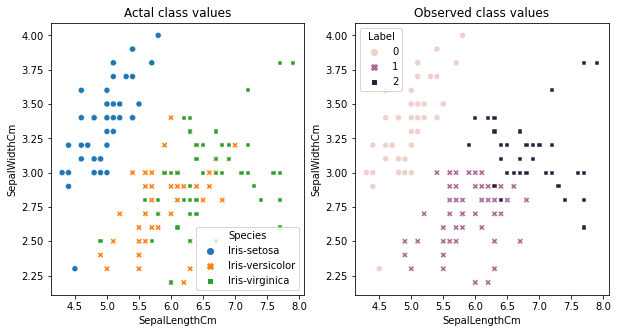

In [35]:
fig,(ax1,ax2,) = plt.subplots(1,2,figsize=(10,5))

ax1 = plt.subplot(1,2,1)
plt.title("Actal class values")
sns.scatterplot(data=data,x='SepalLengthCm',y='SepalWidthCm',hue='Species',style='Species',ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title("Observed class values")
sns.scatterplot(data=data_df,x='SepalLengthCm',y='SepalWidthCm',hue='Label',style='Label',ax=ax2)

plt.show()

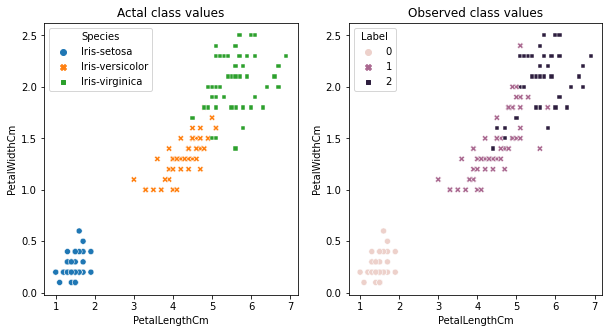

In [37]:
fig,(ax3,ax4,) = plt.subplots(1,2,figsize=(10,5))

ax3 = plt.subplot(1,2,1)
plt.title("Actal class values")
sns.scatterplot(data=data,x='PetalLengthCm',y='PetalWidthCm',hue='Species',style='Species',ax=ax3)

ax4 = plt.subplot(1,2,2)
plt.title("Observed class values")
sns.scatterplot(data=data_df,x='PetalLengthCm',y='PetalWidthCm',hue='Label',style='Label',ax=ax4)

plt.show()

## Analysis Done!